<a href="https://colab.research.google.com/github/Zaxis018/Data-Mining/blob/main/Association_Analysis/rule_mining_apriori.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import numpy as np
import math

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
path = '/content/drive/MyDrive/Colab_Notebooks/groceries2.csv'

In [ ]:
data_df = pd.read_csv(path)
data_df

,Item(s),Item 1,Item 2,Item 3,Item 4,Item 5,Item 6,Item 7,Item 8,Item 9,...,Item 23,Item 24,Item 25,Item 26,Item 27,Item 28,Item 29,Item 30,Item 31,Item 32
0,4,citrus fruit,semi-finished bread,margarine,ready soups,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,3,tropical fruit,yogurt,coffee,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,1,whole milk,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,4,pip fruit,yogurt,cream cheese,meat spreads,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,4,other vegetables,whole milk,condensed milk,long life bakery product,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9830,17,sausage,chicken,beef,hamburger meat,citrus fruit,grapes,root vegetables,whole milk,butter,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
9831,1,cooking chocolate,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
9832,10,chicken,citrus fruit,other vegetables,butter,yogurt,frozen dessert,domestic eggs,rolls/buns,rum,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
9833,4,semi-finished bread,bottled water,soda,bottled beer,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [ ]:
new_df = data_df.head(50)
# Display the new DataFrame
new_df


,Item(s),Item 1,Item 2,Item 3,Item 4,Item 5,Item 6,Item 7,Item 8,Item 9,...,Item 23,Item 24,Item 25,Item 26,Item 27,Item 28,Item 29,Item 30,Item 31,Item 32
0,4,citrus fruit,semi-finished bread,margarine,ready soups,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,3,tropical fruit,yogurt,coffee,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,1,whole milk,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,4,pip fruit,yogurt,cream cheese,meat spreads,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,4,other vegetables,whole milk,condensed milk,long life bakery product,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
5,5,whole milk,butter,yogurt,rice,abrasive cleaner,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
6,1,rolls/buns,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
7,5,other vegetables,UHT-milk,rolls/buns,bottled beer,liquor (appetizer),NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
8,1,potted plants,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
9,2,whole milk,cereals,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [ ]:
new_df.drop('Item(s)', axis=1, inplace=True)

<ipython-input-9-035d60ea6c5c>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  new_df.drop('Item(s)', axis=1, inplace=True)


In [ ]:
new_df.head()

,Item 1,Item 2,Item 3,Item 4,Item 5,Item 6,Item 7,Item 8,Item 9,Item 10,...,Item 23,Item 24,Item 25,Item 26,Item 27,Item 28,Item 29,Item 30,Item 31,Item 32
0,citrus fruit,semi-finished bread,margarine,ready soups,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,tropical fruit,yogurt,coffee,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,whole milk,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,pip fruit,yogurt,cream cheese,meat spreads,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,other vegetables,whole milk,condensed milk,long life bakery product,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


#Data visualization

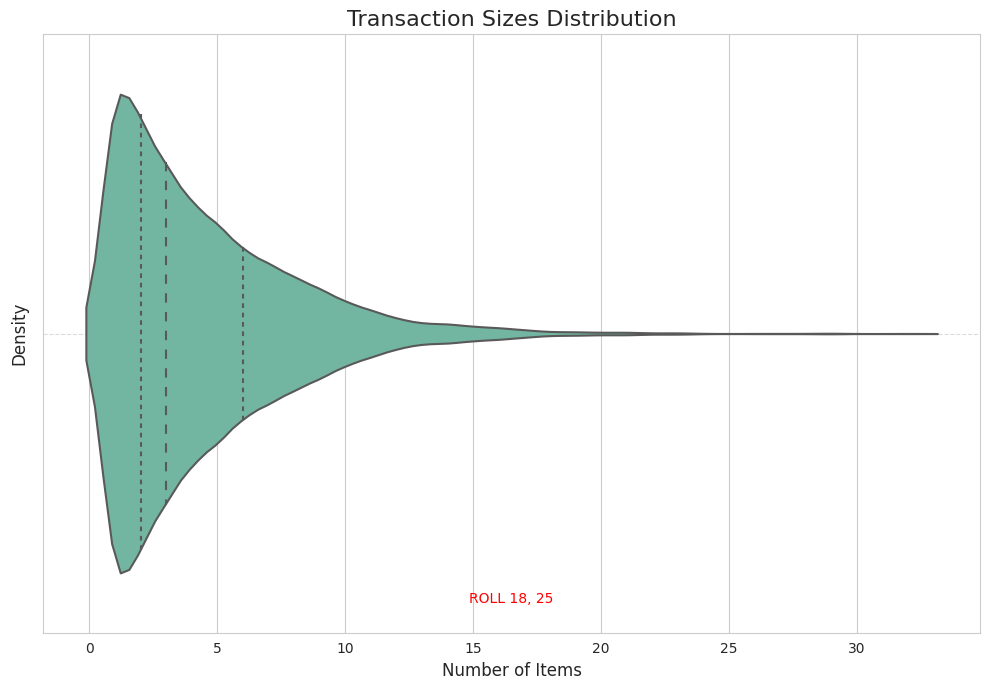

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
num_items_per_transaction = data_df["Item(s)"]

# Set the style using Seaborn
sns.set_style("whitegrid")
plt.figure(figsize=(10, 7))

# Create a violin plot with custom colors
colors = ['#66c2a5', '#fc8d62', '#8da0cb', '#e78ac3']
sns.violinplot(x=num_items_per_transaction, palette=colors, inner="quartile")

# Customize the plot for better presentation
plt.title("Transaction Sizes Distribution", fontsize=16)
plt.xlabel("Number of Items", fontsize=12)
plt.ylabel("Density", fontsize=12)
plt.xticks(fontsize=10)
plt.yticks(fontsize=10)
plt.grid(axis="y", linestyle="--", alpha=0.7)

# Add extra legend
extra_legend = "ROLL 18, 25"
plt.text(0.5, 0.05, extra_legend, ha='center', color='red', transform=plt.gca().transAxes)

# Show the plot
plt.tight_layout()
plt.show()



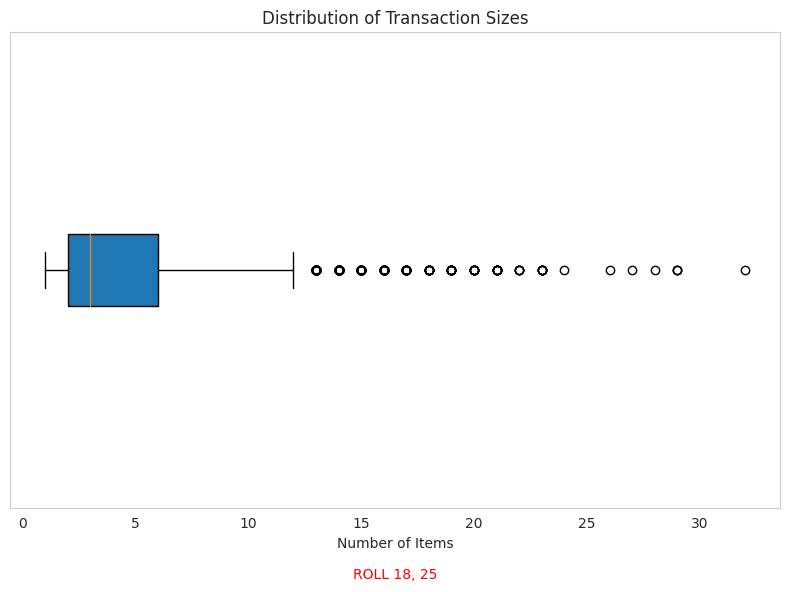

In [ ]:
import matplotlib.pyplot as plt
plt.figure(figsize=(8, 6))

# Use patch_artist=True to fill the box plot with colors
plt.boxplot(num_items_per_transaction, vert=False, patch_artist=True)

# Customize the plot for better presentation
plt.title("Distribution of Transaction Sizes")
plt.xlabel("Number of Items")
plt.grid(axis="x")  # Show grid lines on the x-axis for better readability
plt.yticks([])  # Remove the labels for the y-axis

# Add extra legend
extra_legend = "ROLL 18, 25"
plt.text(0.5, -0.15, extra_legend, ha='center', color='red', transform=plt.gca().transAxes)

plt.tight_layout()

# Show the plot
plt.show()


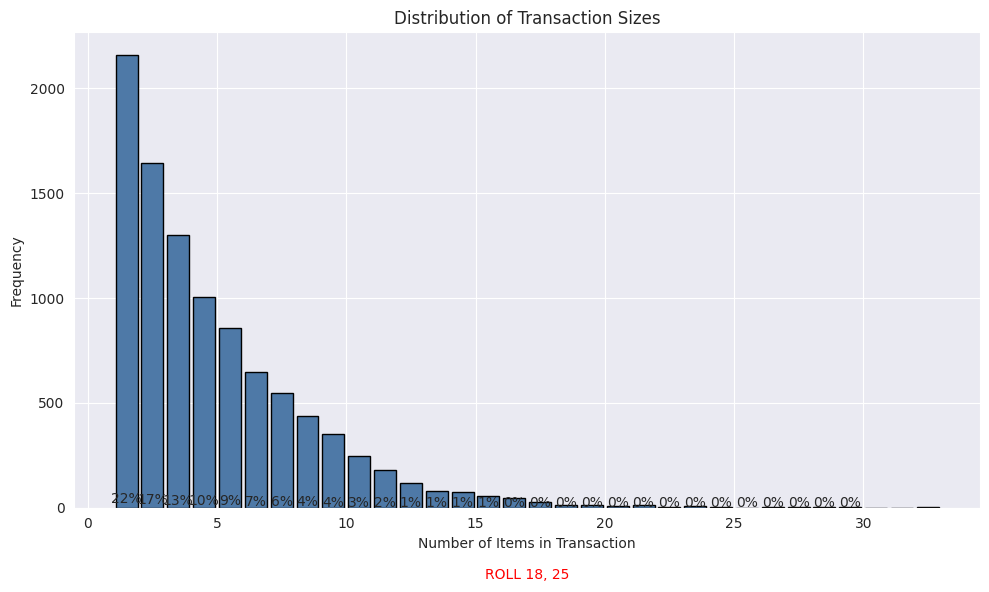

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
num_items_per_transaction = data_df["Item(s)"]
min_size = min(num_items_per_transaction)
max_size = max(num_items_per_transaction)

# Set the style using Seaborn
sns.set_style("darkgrid")
plt.figure(figsize=(10, 6))

# Create bins with a size of 1
bins = list(range(min_size, max_size + 2))

# Create histograms for transaction sizes with a custom color
colors = ['#4e79a7']
plt.hist(num_items_per_transaction, bins=bins, edgecolor="black", color=colors, rwidth=0.85)
plt.title("Distribution of Transaction Sizes")
plt.xlabel("Number of Items in Transaction")
plt.ylabel("Frequency")

# Calculate the percentage of each number of items in the "Item(s)" column
item_count = data_df["Item(s)"].value_counts()
total_transactions = len(data_df["Item(s)"])
percentage_item_purchases = (item_count / total_transactions) * 100

# Add percentage labels above bars
for i, percentage in enumerate(percentage_item_purchases):
    plt.text(bins[i] + 0.5, percentage + 2, f"{round(percentage)}%", ha='center', fontsize=10)

# Add extra legend
extra_legend = "ROLL 18, 25"
plt.text(0.5, -0.15, extra_legend, ha='center', color='red', transform=plt.gca().transAxes)

plt.tight_layout()

# Show the plot
plt.show()



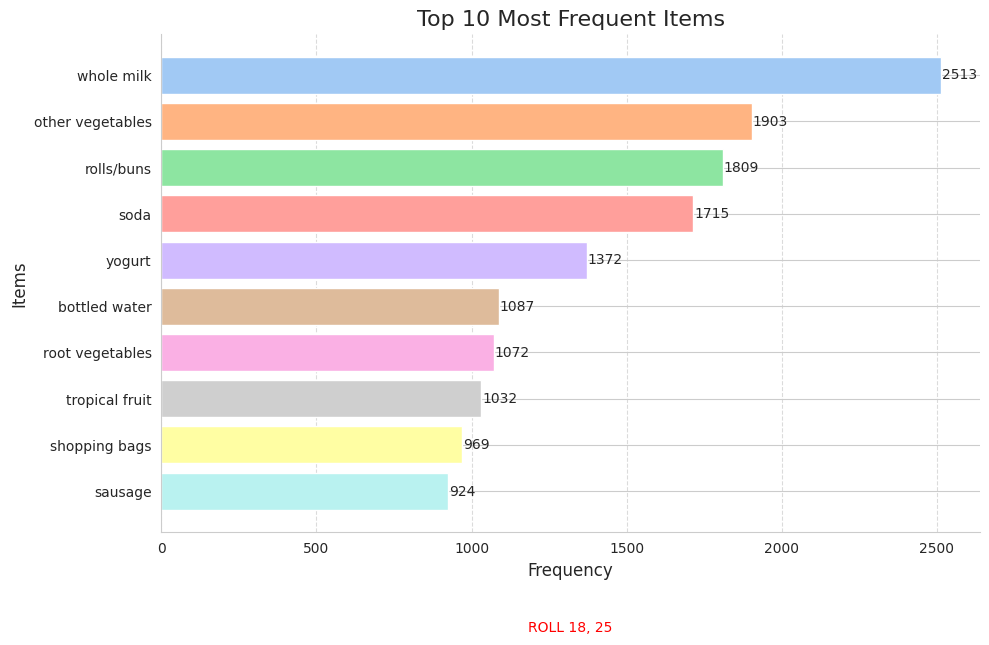

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

# Set the style using Seaborn
sns.set_style("whitegrid")
plt.figure(figsize=(10, 6))

# Calculate the frequency of each item in the DataFrame
item_counts = data_df.iloc[:, 1:].stack().value_counts()

# Select the top 10 most frequent items
top_10_items = item_counts.head(10)

# Create a horizontal bar plot with a custom color
colors = sns.color_palette("pastel")
plt.barh(top_10_items.index, top_10_items.values, color=colors)

# Customize the plot for better presentation
plt.gca().invert_yaxis()  # Invert the y-axis
plt.title("Top 10 Most Frequent Items", fontsize=16)
plt.xlabel("Frequency", fontsize=12)
plt.ylabel("Items", fontsize=12)
plt.xticks(fontsize=10)
plt.yticks(fontsize=10)
plt.grid(axis="x", linestyle="--", alpha=0.7)
plt.gca().spines["right"].set_visible(False)  # Remove right border
plt.gca().spines["top"].set_visible(False)  # Remove top border
plt.tight_layout()

# Add values inside the bars
for index, value in enumerate(top_10_items.values):
    plt.text(value + 3, index, str(value), va="center", fontsize=10)

# Add extra legend
extra_legend = "ROLL 18, 25"
plt.text(0.5, -0.2, extra_legend, ha='center', color='red', transform=plt.gca().transAxes)

# Show the plot
plt.show()


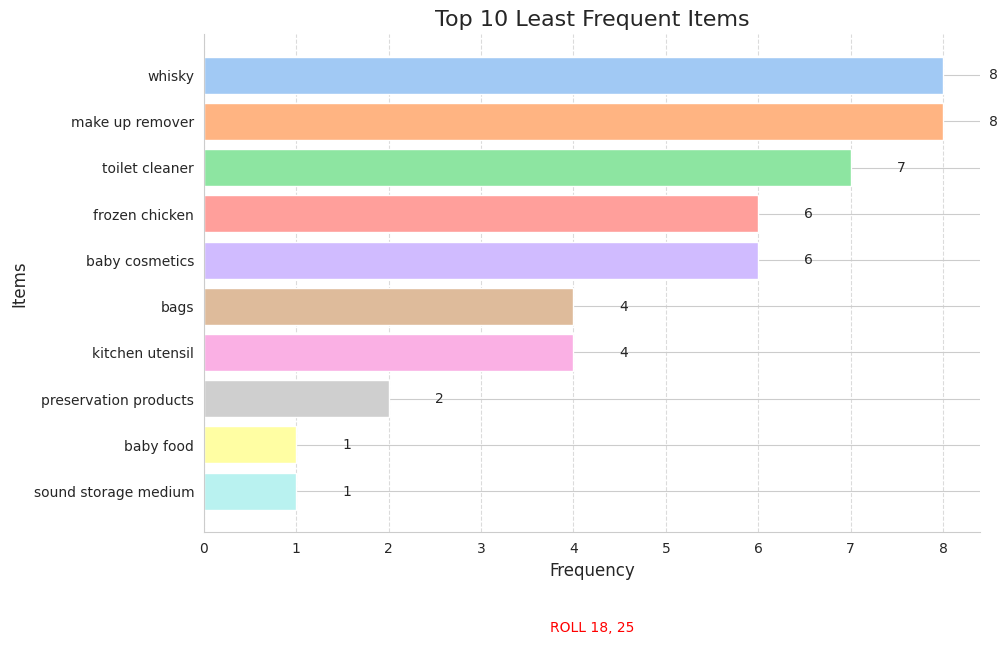

In [ ]:
# Set the style using Seaborn
sns.set_style("whitegrid")
plt.figure(figsize=(10, 6))

# Calculate the frequency of each item in the DataFrame
item_counts = data_df.iloc[:, 1:].stack().value_counts()

# Select the bottom 10 least frequent items
bottom_10_items = item_counts.tail(10)

# Create a horizontal bar plot with a custom color
colors = sns.color_palette("pastel")
bars = plt.barh(bottom_10_items.index, bottom_10_items.values, color=colors)

# Customize the plot for better presentation
plt.gca().invert_yaxis()  # Invert the y-axis
plt.title("Top 10 Least Frequent Items", fontsize=16)
plt.xlabel("Frequency", fontsize=12)
plt.ylabel("Items", fontsize=12)
plt.xticks(fontsize=10)
plt.yticks(fontsize=10)
plt.grid(axis="x", linestyle="--", alpha=0.7)
plt.gca().spines["right"].set_visible(False)  # Remove right border
plt.gca().spines["top"].set_visible(False)  # Remove top border
plt.tight_layout()

# Add values inside the bars at the edge
for bar, value in zip(bars, bottom_10_items.values):
    plt.text(bar.get_width() + 0.5, bar.get_y() + bar.get_height() / 2, str(value), va="center", fontsize=10)

# Add extra legend
extra_legend = "ROLL 18, 25"
plt.text(0.5, -0.2, extra_legend, ha='center', color='red', transform=plt.gca().transAxes)

# Show the plot
plt.show()



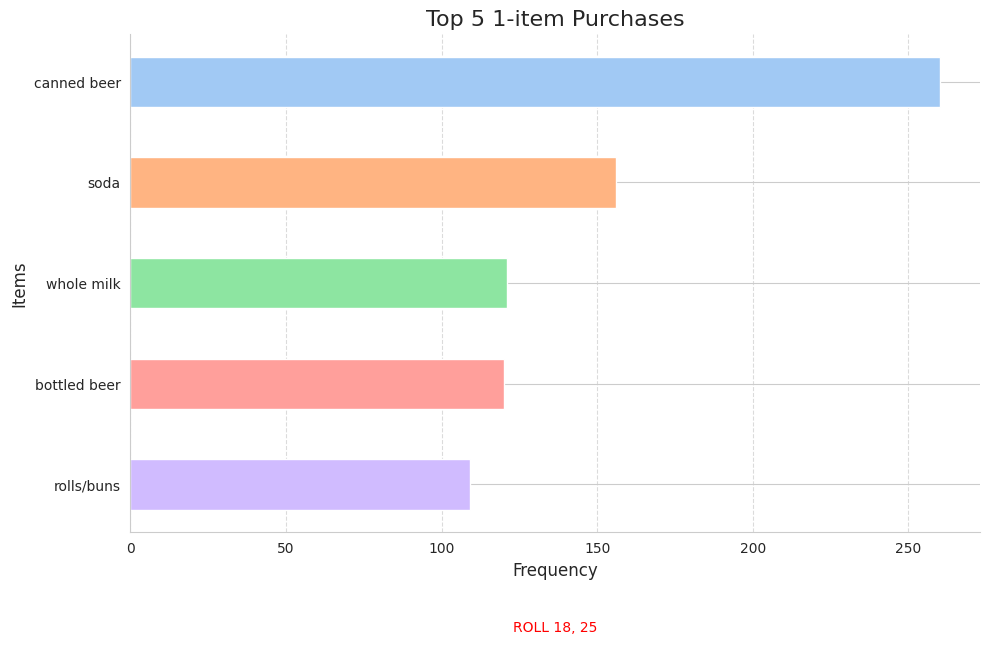

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

# Set the style using Seaborn
sns.set_style("whitegrid")
plt.figure(figsize=(10, 6))

# Extract the item columns
item_columns = data_df.columns[1:33]

# Create a new DataFrame to store the standalone purchases (transactions with only one item)
standalone_purchases = data_df[data_df["Item(s)"] == 1][item_columns]

# Item Frequency Analysis for Standalone Purchases
standalone_item_counts = standalone_purchases.stack().value_counts()
top_standalone_items = standalone_item_counts.head(5)  # Get the top 5 most frequent standalone items

# Create a horizontal bar plot with a custom color
colors = sns.color_palette("pastel")
plt.barh(top_standalone_items.index, top_standalone_items.values, color=colors, height=0.5)

# Customize the plot for better presentation
plt.gca().invert_yaxis()  # Invert the y-axis
plt.title("Top 5 1-item Purchases", fontsize=16)
plt.xlabel("Frequency", fontsize=12)
plt.ylabel("Items", fontsize=12)
plt.xticks(fontsize=10)
plt.yticks(fontsize=10)
plt.grid(axis="x", linestyle="--", alpha=0.7)
plt.gca().spines["right"].set_visible(False)  # Remove right border
plt.gca().spines["top"].set_visible(False)  # Remove top border
plt.tight_layout()

# Add extra legend
extra_legend = "ROLL 18, 25"
plt.text(0.5, -0.2, extra_legend, ha='center', color='red', transform=plt.gca().transAxes)

# Show the plot
plt.show()


In [ ]:
# Initialize a list to store transactions
transactions = []

# Iterate through each row in the DataFrame
for index, row in new_df.iterrows():
    # Convert row to a list and remove 'NaN' items
    transaction = [item for item in row if pd.notna(item)]
    transactions.append(transaction)

# Display the first two transactions
transactions[:2]

[['citrus fruit', 'semi-finished bread', 'margarine', 'ready soups'],
 ['tropical fruit', 'yogurt', 'coffee']]

In [ ]:
# Calculate the number of non-missing values in each transaction
num_non_missing_per_transaction = data_df.iloc[:, 1:33].count(axis=1)

num_items_per_transaction = data_df["Item(s)"]

is_complete_transaction = (num_non_missing_per_transaction == num_items_per_transaction)

# Count the number of rows with missing values or mismatches in item counts
num_incomplete_transactions = (~is_complete_transaction).sum()

# Print the number of incomplete transactions
print("Number of Incomplete Transactions:", num_incomplete_transactions)

Number of Incomplete Transactions: 0


In [ ]:
transactions_df = pd.DataFrame(transactions)
transactions_df

,0,1,2,3,4,5,6,7,8,9,10,11,12
0,citrus fruit,semi-finished bread,margarine,ready soups,None,None,None,None,None,None,None,None,None
1,tropical fruit,yogurt,coffee,None,None,None,None,None,None,None,None,None,None
2,whole milk,None,None,None,None,None,None,None,None,None,None,None,None
3,pip fruit,yogurt,cream cheese,meat spreads,None,None,None,None,None,None,None,None,None
4,other vegetables,whole milk,condensed milk,long life bakery product,None,None,None,None,None,None,None,None,None
5,whole milk,butter,yogurt,rice,abrasive cleaner,None,None,None,None,None,None,None,None
6,rolls/buns,None,None,None,None,None,None,None,None,None,None,None,None
7,other vegetables,UHT-milk,rolls/buns,bottled beer,liquor (appetizer),None,None,None,None,None,None,None,None
8,potted plants,None,None,None,None,None,None,None,None,None,None,None,None
9,whole milk,cereals,None,None,None,None,None,None,None,None,None,None,None


##Frequent Itemset Generation using Apriori Algorithm

In [ ]:
from itertools import combinations
from collections import defaultdict

# Minimum support count
min_support = 2

# Generate candidate 1-itemsets
item_counts = defaultdict(int)
for transaction in transactions:
    for item in transaction:
        item_counts[item] += 1

# Prune infrequent items
frequent_1_itemsets = {item for item, count in item_counts.items() if count >= min_support}

# Generate frequent itemsets of size k
def generate_frequent_itemsets(itemsets, k):
    candidates = set()
    for itemset in itemsets:
        for item in frequent_1_itemsets:
            if item not in itemset:
                candidates.add(itemset + (item,))

    frequent_itemsets = set()
    for candidate in candidates:
        count = sum(1 for transaction in transactions if all(item in transaction for item in candidate))
        if count >= min_support:
            frequent_itemsets.add(candidate)

    return frequent_itemsets

# Generate frequent itemsets of increasing size
k = 2
frequent_itemsets = {(item,) for item in frequent_1_itemsets}
while frequent_itemsets:
    print(f"Frequent {k-1}-itemsets: {frequent_itemsets}")
    k += 1
    candidate_itemsets = generate_frequent_itemsets(frequent_itemsets, k)
    frequent_itemsets = candidate_itemsets

Frequent 1-itemsets: {('beef',), ('butter',), ('waffles',), ('berries',), ('shopping bags',), ('chocolate',), ('rolls/buns',), ('cream cheese',), ('other vegetables',), ('butter milk',), ('yogurt',), ('UHT-milk',), ('root vegetables',), ('coffee',), ('sugar',), ('curd',), ('pastry',), ('brown bread',), ('long life bakery product',), ('sausage',), ('detergent',), ('soda',), ('candy',), ('specialty bar',), ('whole milk',), ('fruit/vegetable juice',), ('tropical fruit',), ('newspapers',), ('flour',), ('abrasive cleaner',), ('whipped/sour cream',), ('cereals',), ('citrus fruit',), ('bottled water',), ('canned beer',), ('beverages',)}
Frequent 2-itemsets: {('other vegetables', 'root vegetables'), ('candy', 'waffles'), ('bottled water', 'curd'), ('brown bread', 'soda'), ('yogurt', 'soda'), ('yogurt', 'whole milk'), ('cream cheese', 'newspapers'), ('sausage', 'soda'), ('other vegetables', 'whipped/sour cream'), ('butter', 'curd'), ('yogurt', 'bottled water'), ('soda', 'brown bread'), ('tropic

In [ ]:
frequent_itemsets

set()

##Rule Generation

In [ ]:
# Generate association rules from frequent itemsets
def generate_association_rules(frequent_itemset):
    rules = []
    for itemset in frequent_itemset:
        for i in range(1, len(itemset)):
            for subset in combinations(itemset, i):
                remaining = tuple(item for item in itemset if item not in subset)
                support_itemset = sum(1 for transaction in transactions if all(item in transaction for item in itemset))
                support_subset = sum(1 for transaction in transactions if all(item in transaction for item in subset))
                confidence = support_itemset / support_subset
                if confidence >= 0.1:  # Minimum confidence threshold
                    rules.append((subset, remaining, confidence))
    return rules

# Generate association rules from frequent itemsets
association_rules = []
for frequent_itemset in frequent_itemsets:
    rules = generate_association_rules(frequent_itemset)
    association_rules.extend(rules)

# Print association rules
for antecedent, consequent, confidence in association_rules:
    print(f"Rule: {antecedent} => {consequent}, Confidence: {confidence:.2f}")

## Library Implementation

In [ ]:
# Extract the item columns
item_columns = data_df.columns[1:33]

# Convert the data into a list of transactions
transactions = data_df[item_columns].apply(lambda row: row.dropna().tolist(), axis=1).tolist()

# Create a one-hot encoded DataFrame for the transactions
onehot_transactions = pd.DataFrame(transactions)

# Apply one-hot encoding
onehot_encoded = pd.get_dummies(onehot_transactions.unstack()).groupby(level=1).max()


/usr/local/lib/python3.10/dist-packages/mlxtend/frequent_patterns/fpcommon.py:110: DeprecationWarning: DataFrames with non-bool types result in worse computationalperformance and their support might be discontinued in the future.Please use a DataFrame with bool type
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/mlxtend/frequent_patterns/fpcommon.py:110: DeprecationWarning: DataFrames with non-bool types result in worse computationalperformance and their support might be discontinued in the future.Please use a DataFrame with bool type
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/mlxtend/frequent_patterns/fpcommon.py:110: DeprecationWarning: DataFrames with non-bool types result in worse computationalperformance and their support might be discontinued in the future.Please use a DataFrame with bool type
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/mlxtend/frequent_patterns/fpcommon.py:110: DeprecationWarning: DataFrames with non-bool types result in wors

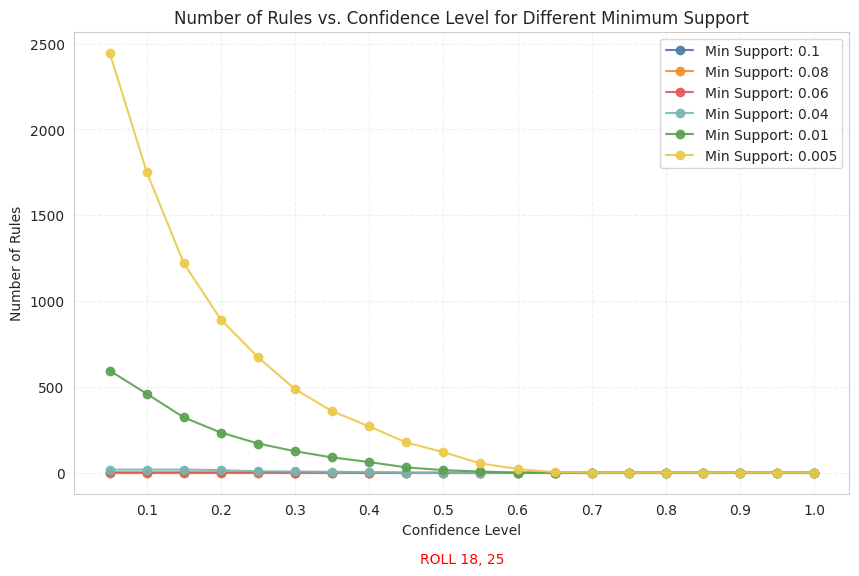

In [ ]:
from mlxtend.preprocessing import TransactionEncoder
from mlxtend.frequent_patterns import apriori, association_rules

# List of minimum support values
min_support_values = [0.1, 0.08, 0.06, 0.04, 0.01, 0.005]  # Adding more values

# Confidence levels to evaluate
confidence_levels = list(np.arange(0.05, 1.05, 0.05))

# Empty lists to store results
num_rules_lists = []

# Calculate and store the number of rules for each combination of minimum support and confidence level
for min_support in min_support_values:
    frequent_itemsets = apriori(onehot_encoded, min_support=min_support, use_colnames=True)
    rules_list = []
    for confidence_level in confidence_levels:
        rules = association_rules(frequent_itemsets, metric="confidence", min_threshold=confidence_level)
        num_rules = len(rules)
        rules_list.append(num_rules)
    num_rules_lists.append(rules_list)

# Plot the results
plt.figure(figsize=(10, 6))

colors = ["#4e79a7", "#f28e2b", "#e15759", "#76b7b2", "#59a14f", "#edc948"]  # Changed line colors

for i, min_support in enumerate(min_support_values):
    plt.plot(confidence_levels, num_rules_lists[i], marker="o", color=colors[i], alpha=0.9,label=f"Min Support: {min_support}")

plt.xlabel("Confidence Level")
plt.ylabel("Number of Rules")
plt.title("Number of Rules vs. Confidence Level for Different Minimum Support")

# Set the desired x-axis labels
plt.xticks([0.10, 0.20, 0.30, 0.40, 0.50, 0.60, 0.70, 0.80, 0.90, 1])

# Add grid lines for better readability
plt.grid(True, linestyle="--", alpha=0.3)

plt.legend()

# Add extra legend
extra_legend = "ROLL 18, 25"
plt.text(0.5, -0.15, extra_legend, ha='center', color='red', transform=plt.gca().transAxes)

plt.show()


In [ ]:
# Run Apriori algorithm with a minimum support threshold of 0.05

from mlxtend.frequent_patterns import apriori, association_rules
frequent_itemsets = apriori(onehot_encoded, min_support=0.015, use_colnames=True)

# Sort the frequent itemsets DataFrame by 'support' in descending order
sorted_frequent_itemsets = frequent_itemsets.sort_values(by="support", ascending=False)

# Calculate the length of each itemset and add it as a new column 'length'
sorted_frequent_itemsets["length"] = sorted_frequent_itemsets["itemsets"].apply(len)

# Display the sorted frequent itemsets DataFrame with the desired formatting
with pd.option_context("display.max_rows", None, "display.max_columns", None, "display.float_format", '{:.3f}'.format):
    print(sorted_frequent_itemsets)


/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)
/usr/local/lib/python3.10/dist-packages/mlxtend/frequent_patterns/fpcommon.py:110: DeprecationWarning: DataFrames with non-bool types result in worse computationalperformance and their support might be discontinued in the future.Please use a DataFrame with bool type
  warnings.warn(


     support                                         itemsets  length
71     0.256                                     (whole milk)       1
45     0.193                               (other vegetables)       1
54     0.184                                     (rolls/buns)       1
61     0.174                                           (soda)       1
72     0.140                                         (yogurt)       1
6      0.111                                  (bottled water)       1
55     0.109                                (root vegetables)       1
66     0.105                                 (tropical fruit)       1
59     0.099                                  (shopping bags)       1
57     0.094                                        (sausage)       1
47     0.089                                         (pastry)       1
17     0.083                                   (citrus fruit)       1
5      0.081                                   (bottled beer)       1
42     0.080        

In [ ]:
# Generate association rules
association_rules_df = association_rules(frequent_itemsets, metric="confidence", min_threshold=0.3)

# Sort the association rules by 'lift' metric in descending order and reset the index
sorted_association_rules = association_rules_df.sort_values(by="lift", ascending=False).reset_index(drop=True)

# Display the sorted association rules DataFrame
print("\nAssociation Rules:")
sorted_association_rules


Association Rules:


/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction,zhangs_metric
0,(beef),(root vegetables),0.052466,0.108998,0.017387,0.331395,3.040367,0.011668,1.332628,0.708251
1,"(other vegetables, whole milk)",(root vegetables),0.074835,0.108998,0.023183,0.309783,2.842082,0.015026,1.290900,0.700572
2,"(tropical fruit, whole milk)",(yogurt),0.042298,0.139502,0.015150,0.358173,2.567516,0.009249,1.340701,0.637483
3,"(root vegetables, whole milk)",(other vegetables),0.048907,0.193493,0.023183,0.474012,2.449770,0.013719,1.533320,0.622230
4,(curd),(yogurt),0.053279,0.139502,0.017285,0.324427,2.325615,0.009853,1.273732,0.602085
5,(root vegetables),(other vegetables),0.108998,0.193493,0.047382,0.434701,2.246605,0.026291,1.426693,0.622764
6,(chicken),(other vegetables),0.042908,0.193493,0.017895,0.417062,2.155439,0.009593,1.383521,0.560090
7,"(tropical fruit, whole milk)",(other vegetables),0.042298,0.193493,0.017082,0.403846,2.087140,0.008898,1.352851,0.543880
8,(whipped/sour cream),(other vegetables),0.071683,0.193493,0.028876,0.402837,2.081924,0.015006,1.350565,0.559803
9,"(yogurt, whole milk)",(other vegetables),0.056024,0.193493,0.022267,0.397459,2.054131,0.011427,1.338511,0.543633


/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)
<ipython-input-29-2a1b0da243a5>:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  top_df['rule'] = top_df['antecedents'].apply(lambda x: ', '.join(x)) + ' -> ' + top_df['consequents'].apply(lambda x: ', '.join(x))


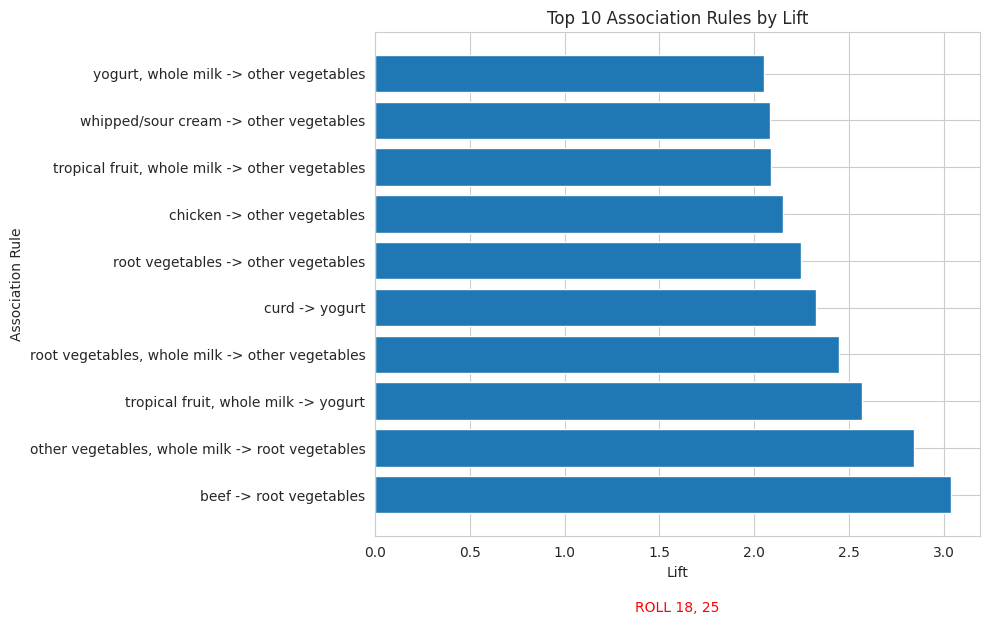

In [ ]:

association_rules_df = association_rules_df.sort_values(by='lift', ascending=False)

# Choose the top N rules to display
top_n = 10
top_df = association_rules_df.head(top_n)

# Convert frozenset objects to strings for concatenation
top_df['rule'] = top_df['antecedents'].apply(lambda x: ', '.join(x)) + ' -> ' + top_df['consequents'].apply(lambda x: ', '.join(x))

plt.figure(figsize=(10, 6))
plt.barh(top_df['rule'], top_df['lift'])
plt.xlabel('Lift')
plt.ylabel('Association Rule')
plt.title(f'Top {top_n} Association Rules by Lift')
plt.tight_layout()
extra_legend = "ROLL 18, 25"
plt.text(0.5, -0.15, extra_legend, ha='center', color='red', transform=plt.gca().transAxes)
plt.show()



/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


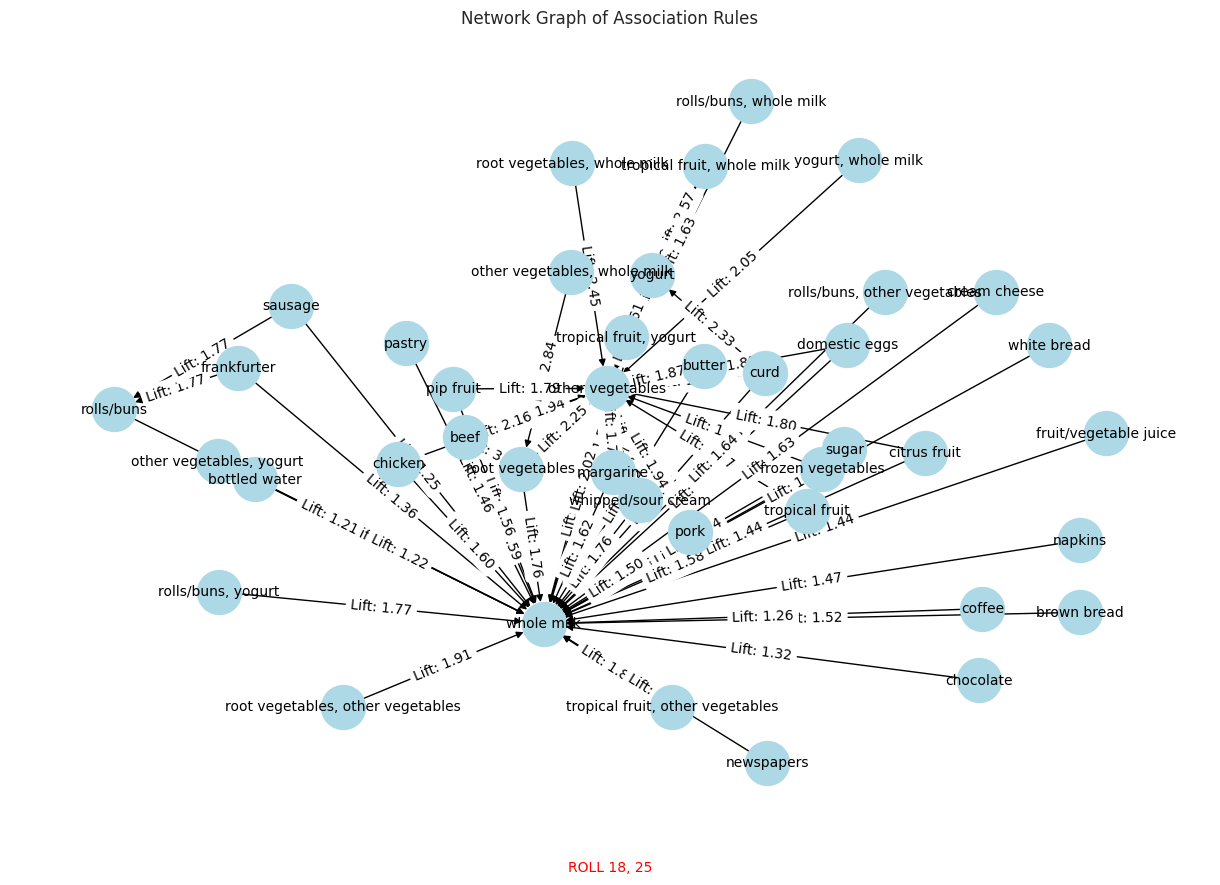

In [ ]:
import networkx as nx
G = nx.DiGraph()
# Add nodes and edges
for index, row in association_rules_df.iterrows():
    antecedent = ', '.join(row['antecedents'])
    consequent = ', '.join(row['consequents'])
    G.add_node(antecedent)
    G.add_node(consequent)
    G.add_edge(antecedent, consequent, weight=row['lift'])

# Position nodes using a spring layout algorithm
pos = nx.spring_layout(G)
plt.figure(figsize=(12, 8))

# Draw nodes and edges
nx.draw(G, pos, with_labels=True, font_size=10, node_size=1000, node_color='lightblue')
nx.draw_networkx_edge_labels(G, pos, edge_labels={(u, v): f'Lift: {d["weight"]:.2f}' for u, v, d in G.edges(data=True)})
plt.title('Network Graph of Association Rules')
extra_legend = "ROLL 18, 25"
plt.text(0.5, -0.05, extra_legend, ha='center', color='red', transform=plt.gca().transAxes)

plt.show()
